**Dependencies**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot # for mnist image visualization
%matplotlib inline

In [41]:
np.random.seed(42)

**Loading Dataset **

In [4]:
df =pd.read_csv(r"Dataset/train.csv")

In [48]:
test=pd.read_csv(r"Dataset/test.csv")

**Separating features and label**

In [6]:
features=df.iloc[:,1:]/255
labels=df.iloc[:,0]

**Image Viz**

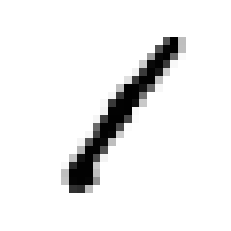

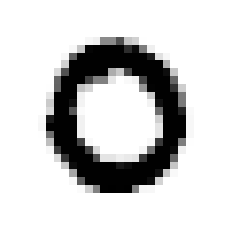

In [10]:
for i in range(2):
    pyplot.imshow(np.array(features.iloc[i]).reshape(28,28),cmap='Greys')
    pyplot.axis('off')
    pyplot.show()

In [11]:
labels=np.asarray(labels)

**One Hot encoding image labels**

In [12]:
lr = np.arange(10)
one_hot=np.zeros((len(labels),10))
for i in range(len(labels)):
    one_hot[i,:]=(lr==labels[i]).astype(np.float)

**Utility functions**

In [33]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

def sigmgrad(a):
    return sigmoid(a)*(1-sigmoid(a))

def weight_initialize(inpt,outpt):
    return np.random.normal(0,1,(inpt+1,outpt))


def getgrad(x,y,theta1,theta2,regconst):
    (n,m)=x.shape
    a1=np.vstack((np.ones((1,m)),x))
    z2=np.dot(theta1.T,a1)
    a2=np.vstack((np.ones((1,m)),sigmoid(z2)))
    a3=sigmoid(np.dot(theta2.T,a2))
    
    theta1t=theta1[1:,:]
    theta2t=theta2[1:,:]
    
    cost=np.sum(np.sum( -y*np.log(a3) - (1-y)*np.log(1-a3) ))/m + (regconst/(2*m))*(sum(sum(theta1t*theta1t))+sum(sum(theta2t*theta2t)))
    
    #backpropagation
    
    d3=a3-y
    d2=np.dot(theta2t,d3)*sigmoid(z2)
    err2=np.dot(d3,a2.T)
    err1=np.dot(d2,a1.T)
    
    theta2Grad= err2.T/m  +(regconst/m)*np.vstack((np.zeros((1,l2)),theta2t))
    theta1Grad=err1.T/m  +(regconst/m)*np.vstack((np.zeros((1,l1)),theta1t))
    
    return [theta1Grad, theta2Grad,cost]


def gradDescent(X, y, theta1, theta2, regconst, num_iter, alpha):
    # theta1 :- Layer 1 weights
    # theta2 :- layer 2 weights 
    # regconst :- regularization coefficient
    # alpha :- Learning rate
    # num_iter:- Number of training iteration 
    cost = np.zeros(num_iter)
    for i in range(0, num_iter):
        [theta1Grad, theta2Grad, cost[i]] = getgrad(X, y, theta1, theta2, regconst)
        theta1 = theta1 - alpha*theta1Grad
        theta2 = theta2 - alpha*theta2Grad
        
        # printing the current status
        if (i+1)%(num_iter*0.1) == 0:
            per = float(i+1)/num_iter*100
            print(str(per)+"% Completed, Cost:"+str(cost[i]))
    return [theta1, theta2, cost]

def MgradDescent(X, y, theta1, theta2, regconst, num_iter, alpha, mu):
    # theta1 :- Layer 1 weights
    # theta2 :- layer 2 weights 
    # regconst :- regularization coefficient
    # alpha :- Learning rate
    # num_iter:- Number of training iteration
    #mu :- momentum coefficient
    cost = np.zeros(num_iter)
    v1 = 0
    v2 = 0
    for i in range(0, num_iter):
        [theta1Grad, theta2Grad, cost[i]] = getgrad(X, y, theta1, theta2, regconst)
        v1 = mu*v1 +  (1-mu)*alpha*theta1Grad
        v2 = mu*v2 +  (1-mu)*alpha*theta2Grad
        theta1 -= v1*alpha
        theta2 -= v2*alpha
        # printing the current status
        if (i+1)%(num_iter*0.1) == 0:
            per = float(i+1)/num_iter*100
            print(str(per)+"% Completed, Cost:"+str(cost[i]))
    return [theta1, theta2, cost]


def predict(X, theta1, theta2):	
    (n, m) = X.shape
    a1 = np.vstack((np.ones((1,m)),X))
    z2 = np.dot(theta1.T, a1)
    a2 = np.vstack((np.ones((1,m)),sigmoid(z2)))
    a3 = sigmoid(np.dot(theta2.T, a2))
    
    return np.argmax(a3)



**Fixing Layer Size**

In [15]:
l1=50  # number of nodes in hidden layer
l2=10  # number of nodes in output layer

In [16]:
features=features.T
one_hot=one_hot.T

(n, m) = features.shape

**Random weight Initialization**

In [17]:
initial_theta1 =  weight_initialize(n, l1)
initial_theta2 = weight_initialize(l1, l2)

**Training**

In [46]:
#out = gradDescent(features,one_hot, initial_theta1, initial_theta2, 0.3, 100,0.01 )
out = MgradDescent(features,one_hot, initial_theta1, initial_theta2, 0.2,2000, 0.05, 0.9)

10.0% Completed, Cost:5.117135920913186
20.0% Completed, Cost:4.32341904847583
30.0% Completed, Cost:3.889428071720971
40.0% Completed, Cost:3.59597729120748
50.0% Completed, Cost:3.380469067860108
60.0% Completed, Cost:3.213322080033151
70.0% Completed, Cost:3.078174244952019
80.0% Completed, Cost:2.965886722002207
90.0% Completed, Cost:2.870812853620638
100.0% Completed, Cost:2.7890978765463075


In [47]:
[theta1, theta2, cost]= out

**Checking Model on test data**

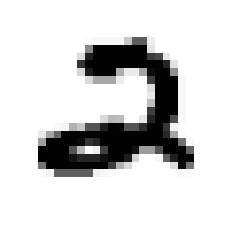

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


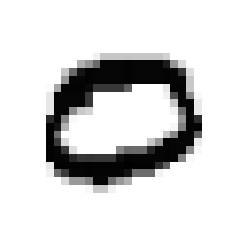

0


In [52]:
for i in range(2):
    pyplot.imshow(np.array(test.iloc[i]).reshape(28,28),cmap='Greys')
    pyplot.axis('off')
    pyplot.show()
    print(predict(np.expand_dims(np.array(test.iloc[i]),axis=0).T, theta1, theta2))